<a href="https://colab.research.google.com/github/chrissoria1/CSC521Algorithms/blob/main/W6_Christopher_Soria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TSP_using_the_Nearest_Neighbor_Heuristic

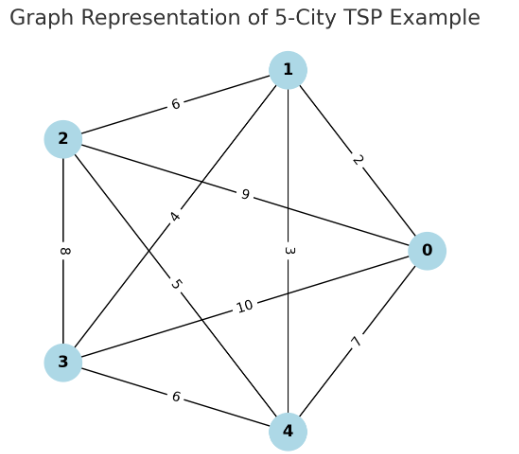

In [1]:
import numpy as np

# Distance matrix for 5 cities (symmetric, 0 on diagonals)
# You can update these values as needed
distance_matrix = np.array([
    [0, 2, 9, 10, 7],
    [2, 0, 6, 4, 3],
    [9, 6, 0, 8, 5],
    [10, 4, 8, 0, 6],
    [7, 3, 5, 6, 0]
])

num_cities = len(distance_matrix)

def nearest_neighbor(start_city, dist_matrix):
    visited = [start_city]
    total_distance = 0
    current_city = start_city

    while len(visited) < num_cities:
        # find the nearest unvisited city
        distances = dist_matrix[current_city]
        nearest_city = None
        nearest_distance = float("inf")

        for city in range(num_cities):
            if city not in visited and distances[city] < nearest_distance:
                nearest_city = city
                nearest_distance = distances[city]

        visited.append(nearest_city)
        total_distance += nearest_distance
        current_city = nearest_city

    # return to starting city
    total_distance += dist_matrix[current_city][start_city]
    visited.append(start_city)

    return visited, total_distance

# Run nearest neighbor starting from each city
for start in range(num_cities):
    tour, dist = nearest_neighbor(start, distance_matrix)
    print(f"Starting at city {start}: Tour = {tour}, Total Distance = {dist}")


Starting at city 0: Tour = [0, 1, 4, 2, 3, 0], Total Distance = 28
Starting at city 1: Tour = [1, 0, 4, 2, 3, 1], Total Distance = 26
Starting at city 2: Tour = [2, 4, 1, 0, 3, 2], Total Distance = 28
Starting at city 3: Tour = [3, 1, 0, 4, 2, 3], Total Distance = 26
Starting at city 4: Tour = [4, 1, 0, 2, 3, 4], Total Distance = 28


Brute_Force_Linear_Search

In [2]:
def linear_search(arr, target):
    """
    Perform a linear search on the given array to find the target element.
    Parameters:
        arr (list): The list of elements to search through
        target (any): The element we want to find
    Returns:
        int: The index of the target if found, otherwise -1
    """

    # Loop through each element in the array using its index
    for i in range(len(arr)):
        # Print the current state of the search (for understanding the process)
        print(f"Iteration {i + 1}: Checking element {arr[i]}")

        # Check if the current element is equal to the target
        if arr[i] == target:
            print(f"Target {target} found at index {i}")
            return i  # Return the index where the target is found

    # If the loop finishes without finding the target, print a message
    print(f"Target {target} not found in the array")
    return -1  # Return -1 when the target does not exist in the array


# Example usage
arr = [1, 3, 5, 7, 9, 10, 79, 81]  # Sample list of numbers
target = 81  # Element we want to search for

# Call the linear_search function
result = linear_search(arr, target)

# Check the result and print an additional message
if result == -1:
    print("Element not found")


Iteration 1: Checking element 1
Iteration 2: Checking element 3
Iteration 3: Checking element 5
Iteration 4: Checking element 7
Iteration 5: Checking element 9
Iteration 6: Checking element 10
Iteration 7: Checking element 79
Iteration 8: Checking element 81
Target 81 found at index 7


DFS_and_BFS_Algorithms

DFS sequence of visited nodes: ['A', 'B', 'D', 'E', 'C', 'F']


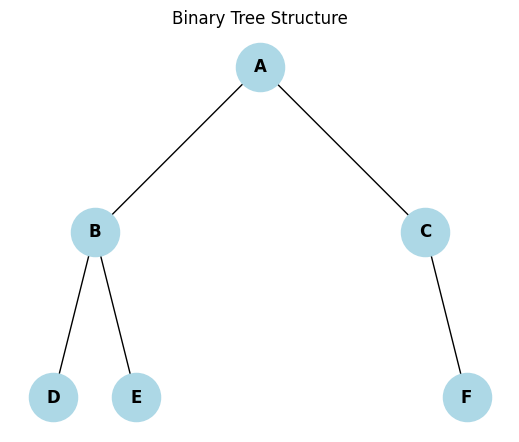

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the Node class
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Build the example binary tree with letters
root = Node('A')
root.left = Node('B')
root.right = Node('C')
root.left.left = Node('D')
root.left.right = Node('E')
root.right.right = Node('F')

# DFS traversal order (preorder: root -> left -> right)
def dfs_order(root, visited=None):
    if visited is None:
        visited = []
    if root:
        visited.append(root.value)
        dfs_order(root.left, visited)
        dfs_order(root.right, visited)
    return visited

# Get DFS order
dfs_sequence = dfs_order(root)
print("DFS sequence of visited nodes:", dfs_sequence)

# Build a graph for visualization
G = nx.DiGraph()
edges = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F')
]
G.add_edges_from(edges)

# Position nodes with a compact layout
pos = {
    'A': (0, 3),
    'B': (-0.8, 2),
    'C': (0.8, 2),
    'D': (-1, 1),
    'E': (-0.6, 1),
    'F': (1, 1)
}

plt.figure(figsize=(5, 4))
nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue", font_size=12, font_weight="bold", arrows=False)
plt.title("Binary Tree Structure")
plt.show()


In [20]:
# Run BFS starting from node 1
bfs_sequence = bfs(tree, 1)
print("DFS sequence of visited nodes:", dfs_sequence)

DFS sequence of visited nodes: ['A', 'B', 'D', 'E', 'C', 'F']


In [19]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Create a simple binary tree using letters
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}

# BFS function
def bfs(tree, start):
    visited = []
    queue = deque([start])

    while queue:
        node = queue.popleft()
        visited.append(node)
        for child in tree.get(node, []):
            queue.append(child)
    return visited

# Run BFS starting from node 'A'
bfs_sequence = bfs(tree, 'A')
print("BFS sequence of visited nodes:", bfs_sequence)

# Plot the tree
G = nx.DiGraph()
for parent, children in tree.items():
    for child in children:
        G.add_edge(parent, child)


BFS sequence of visited nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G']


Knapsack_Brute_Force_and_DP

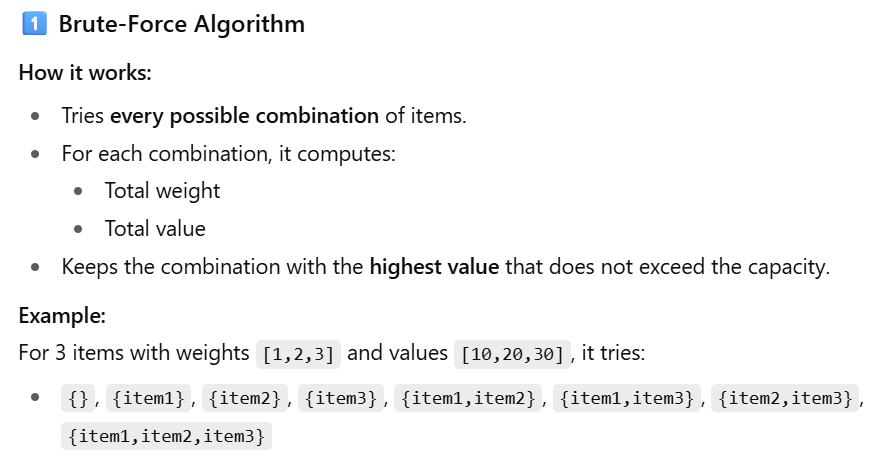

In [21]:
import itertools
import numpy as np

# Define weights, values, and maximum capacity
weights = [1, 2, 3, 2, 5, 4]
values  = [10, 15, 40, 25, 60, 50]
W = 75  # Maximum weight capacity
n = len(weights)

# ==============================
# Brute-force solution
# ==============================
max_value_bf = 0
best_combination_bf = []

# Generate all possible subsets of items
for r in range(1, n+1):
    for subset in itertools.combinations(range(n), r):
        total_weight = sum(weights[i] for i in subset)
        total_value  = sum(values[i] for i in subset)
        if total_weight <= W and total_value > max_value_bf:
            max_value_bf = total_value
            best_combination_bf = subset

print("=== Brute-force Solution ===")
print(f"Maximum value that can be carried: {max_value_bf}")
print(f"The Knapsack Items (1-based indices): {[i+1 for i in best_combination_bf]}\n")




=== Brute-force Solution ===
Maximum value that can be carried: 200
The Knapsack Items (1-based indices): [1, 2, 3, 4, 5, 6]



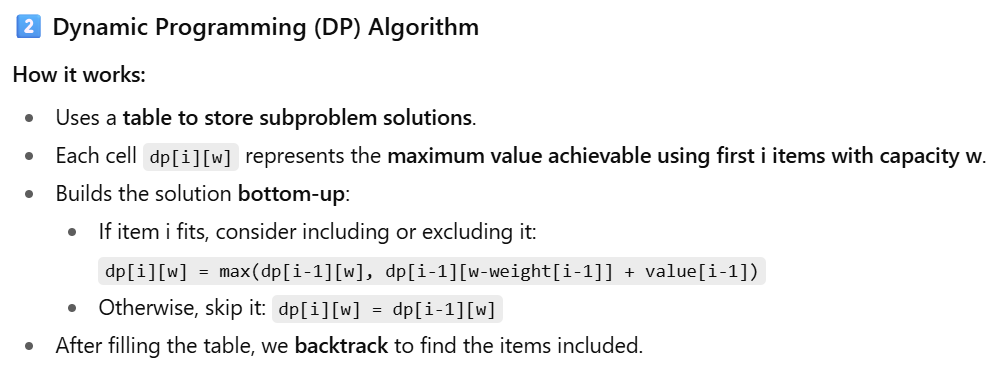

In [22]:
# ==============================
# Dynamic Programming solution
# ==============================
def knapsack_dp(weights, values, W):
    n = len(weights)
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w],
                               dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    # Backtrack to find selected items
    selected_items = []
    w = W
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i)
            w -= weights[i - 1]

    return dp[n][W], selected_items, dp

max_value_dp, selected_items_dp, dp_table = knapsack_dp(weights, values, W)

print("=== Dynamic Programming Solution ===")
print(f"Maximum value that can be carried: {max_value_dp}")
print(f"The Knapsack Items (1-based indices): {selected_items_dp[::-1]}")

print("\nDynamic Programming Table:")
for row in dp_table:
    print(row)

=== Dynamic Programming Solution ===
Maximum value that can be carried: 200
The Knapsack Items (1-based indices): [1, 2, 3, 4, 5, 6]

Dynamic Programming Table:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[0, 10, 15, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
[0